In [190]:
import getpass
import platform
user_platform = platform.uname().system
username = getpass.getuser()
root = ""
if user_platform == "Windows":
    root = "C:/Users/"
else:
    root = "/Users/"

In [191]:
import geopandas as gpd
shapefile_path = root+username+"/Downloads/tl_2021_us_county/tl_2021_us_county.shp"
geo_df = gpd.read_file(shapefile_path)
geo_df.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-96.55516 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.38368 34.69213, -104.37658 34.6..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.6814 41.04566, -96.68139 41.0456..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.04802 40.35066, -98.04674 40.350..."


In [192]:
import pandas as pd
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
def makeFipsData():
    df_fips = pd.read_csv("datasets/fips_codes.csv")
    df_fips = df_fips.dropna().reset_index()
    df_fips = df_fips.drop(columns="index")
    df_fips['state'] = df_fips['state'].map(state_map)
    df_fips["County"] = df_fips["name"] + ", " + df_fips['state']
    return df_fips
def cleanAlzData(fileName):
    df = pd.read_csv("datasets/" + fileName)
    df = df.drop(columns=["Unnamed: 0"])
    df_fips = makeFipsData()
    df[['Mean Prevalence%', '95% CI Low Prevalence%', '95% CI High Prevalence%']] = df['Prevalence, % (95%CI)'].str.extract(r'([\d.]+) \(([\d.]+), ([\d.]+)\)')
    df[['Mean Diagnosis Count', '95% CI Low Diagnosis Count', '95% CI High Diagnosis Count']] = df['No. (95%CI) of people with AD, in thousands'].str.extract(r'([\d.]+) \(([\d.]+), ([\d.]+)\)')
    df[['Mean Prevalence%', '95% CI Low Prevalence%', '95% CI High Prevalence%']] = df[['Mean Prevalence%', '95% CI Low Prevalence%', '95% CI High Prevalence%']].astype(float)
    df[['Mean Diagnosis Count', '95% CI Low Diagnosis Count', '95% CI High Diagnosis Count']] = df[['Mean Diagnosis Count', '95% CI Low Diagnosis Count', '95% CI High Diagnosis Count']].astype(float)
    df = pd.merge(df, df_fips, how="inner", on="County")
    df.insert(1, "FIPS", df.pop("fips"))
    return df

def cleanCancerData(fileName):
    df = pd.read_csv("datasets/" + fileName, skiprows=8)
    df = df.dropna()
    df.index -= 1
    df = df[(df["Lower 95% Confidence Interval"] != "data not available") & (df["Average Annual Count"] != "3 or fewer")]
    #Must include when initializing dataframe:
    df = df.drop(columns=["Lower CI (CI*Rank)", "CI*Rank([rank note])", "Upper CI (CI*Rank)"])
    df["County"] = df["County"].str[:-3]
    return df


#for cancer data:
# Replace values where "Average Annual Count" is "3 or fewer" with 3
    #df = df.replace("3 or fewer", 3)
    #df = df.replace("* ", 0)
    # Convert the column to numeric if necessary
    #df = df.apply(pd.to_numeric, errors="ignore")

#or:
#df = df[(df["Lower 95% Confidence Interval"] != "data not available") & (df["Average Annual Count"] != "3 or fewer")]


In [193]:
df_alz = cleanAlzData("alz13081-sup-0004-table2.csv")
alz_filepath = "/alz13081-sup-0004-table2.csv"
df_alz = cleanAlzData(alz_filepath)
df_alz.head(5)

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,95% CI Low Prevalence%,95% CI High Prevalence%,Mean Diagnosis Count,95% CI Low Diagnosis Count,95% CI High Diagnosis Count,name,state
0,"Autauga County, Alabama",1001,9.1,"11.4 (10.8, 11.9)","1 (1, 1.1)",10.2,56.0,14.8,1.2,11.4,10.8,11.9,1.0,1.0,1.1,Autauga County,Alabama
1,"Baldwin County, Alabama",1003,49.5,"10 (9.5, 10.5)","4.9 (4.7, 5.2)",9.2,53.9,5.0,1.5,10.0,9.5,10.5,4.9,4.7,5.2,Baldwin County,Alabama
2,"Barbour County, Alabama",1005,5.0,"13.5 (12.9, 14.1)","0.7 (0.6, 0.7)",10.4,56.5,37.1,1.1,13.5,12.9,14.1,0.7,0.6,0.7,Barbour County,Alabama
3,"Bibb County, Alabama",1007,3.8,"11.3 (10.8, 11.9)","0.4 (0.4, 0.5)",10.5,55.7,13.7,1.5,11.3,10.8,11.9,0.4,0.4,0.5,Bibb County,Alabama
4,"Blount County, Alabama",1009,11.0,"10.1 (9.6, 10.7)","1.1 (1.1, 1.2)",10.1,54.6,1.4,2.7,10.1,9.6,10.7,1.1,1.1,1.2,Blount County,Alabama


In [194]:
df_cancer = cleanCancerData("incd_us.csv")

In [195]:
df_cancermerge = df_cancer[["FIPS", "Average Annual Count", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]]
df_cancermerge["Cancer Avg. Count"] = df_cancermerge["Average Annual Count"]
df_cancermerge["Cancer Rate"] = df_cancermerge["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]
df_cancermerge = df_cancermerge.drop(columns=["Average Annual Count", "Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"])
df_cancermerge["Cancer Avg. Count"] = df_cancermerge["Cancer Avg. Count"].astype(float)
df_cancermerge["Cancer Rate"] = df_cancermerge["Cancer Rate"].astype(float)
df_cancermerge.head(10)

/var/folders/_v/ncwq304d761gb02f1n7x_2vr0000gn/T/ipykernel_42393/4070650627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancermerge["Cancer Avg. Count"] = df_cancermerge["Average Annual Count"]
/var/folders/_v/ncwq304d761gb02f1n7x_2vr0000gn/T/ipykernel_42393/4070650627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancermerge["Cancer Rate"] = df_cancermerge["Age-Adjusted Incidence Rate([rate note]) - cases per 100,000"]


,FIPS,Cancer Avg. Count,Cancer Rate
0,12125.0,245.0,1248.4
1,27155.0,37.0,693.5
2,48373.0,436.0,679.5
3,51640.0,55.0,655.0
4,31077.0,21.0,653.1
5,46041.0,28.0,634.5
6,28119.0,52.0,626.5
7,30107.0,19.0,626.0
8,46049.0,21.0,625.3
9,48433.0,12.0,621.1


In [196]:
df_alz['FIPS'] = df_alz['FIPS'].astype(int)
df_alz['FIPS'] = df_alz['FIPS'].astype(str).str.zfill(5)
geo_df['GEOID'] = geo_df['GEOID'].astype(str).str.zfill(5)
geo_df.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-96.55516 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.38368 34.69213, -104.37658 34.6..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.6814 41.04566, -96.68139 41.0456..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.04802 40.35066, -98.04674 40.350..."


In [197]:
alz_map_data = pd.merge(df_alz, geo_df, how="inner", left_on="FIPS", right_on="GEOID")
alz_map_data

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,"Autauga County, Alabama",01001,9.1,"11.4 (10.8, 11.9)","1 (1, 1.1)",10.2,56.0,14.8,1.2,11.4,...,G4020,388,33860,None,A,1539634184,25674812,+32.5322367,-086.6464395,"POLYGON ((-86.58826 32.36775, -86.58834 32.367..."
1,"Baldwin County, Alabama",01003,49.5,"10 (9.5, 10.5)","4.9 (4.7, 5.2)",9.2,53.9,5.0,1.5,10.0,...,G4020,380,19300,None,A,4117656514,1132955729,+30.6592183,-087.7460666,"POLYGON ((-87.61542 31.041, -87.61542 31.04073..."
2,"Barbour County, Alabama",01005,5.0,"13.5 (12.9, 14.1)","0.7 (0.6, 0.7)",10.4,56.5,37.1,1.1,13.5,...,G4020,None,21640,None,A,2292160149,50523213,+31.8702531,-085.4051035,"POLYGON ((-85.41585 31.68164, -85.41619 31.677..."
3,"Bibb County, Alabama",01007,3.8,"11.3 (10.8, 11.9)","0.4 (0.4, 0.5)",10.5,55.7,13.7,1.5,11.3,...,G4020,142,13820,None,A,1612188717,9572303,+33.0158929,-087.1271475,"POLYGON ((-86.87657 33.01891, -86.87657 33.018..."
4,"Blount County, Alabama",01009,11.0,"10.1 (9.6, 10.7)","1.1 (1.1, 1.2)",10.1,54.6,1.4,2.7,10.1,...,G4020,142,13820,None,A,1670259090,14860281,+33.9773575,-086.5664400,"POLYGON ((-86.56421 33.80194, -86.56556 33.801..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,"Sweetwater County, Wyoming",56037,5.9,"9.2 (8.6, 9.8)","0.5 (0.5, 0.6)",8.0,50.6,1.1,8.8,9.2,...,G4020,None,40540,None,A,27005754359,166230245,+41.6603282,-108.8756774,"POLYGON ((-109.56509 40.99839, -109.56522 40.9..."
3136,"Teton County, Wyoming",56039,3.9,"9.3 (8.7, 9.8)","0.4 (0.3, 0.4)",9.4,49.0,0.7,3.1,9.3,...,G4020,None,27220,None,A,10351790059,570859114,+44.0486620,-110.4260870,"POLYGON ((-110.1196 44.13258, -110.11952 44.13..."
3137,"Uinta County, Wyoming",56041,3.2,"8.7 (8.2, 9.2)","0.3 (0.3, 0.3)",8.0,50.0,0.8,4.2,8.7,...,G4020,None,21740,None,A,5391631765,16625817,+41.2847255,-110.5589468,"POLYGON ((-110.5849 41.57916, -110.58367 41.57..."
3138,"Washakie County, Wyoming",56043,1.8,"11.1 (10.4, 11.7)","0.2 (0.2, 0.2)",13.0,51.7,0.4,5.9,11.1,...,G4020,None,None,None,A,5798152471,10415890,+43.8788305,-107.6690520,"POLYGON ((-107.68405 44.1664, -107.68402 44.16..."


In [198]:
geo_alz_map_data = gpd.GeoDataFrame(alz_map_data)

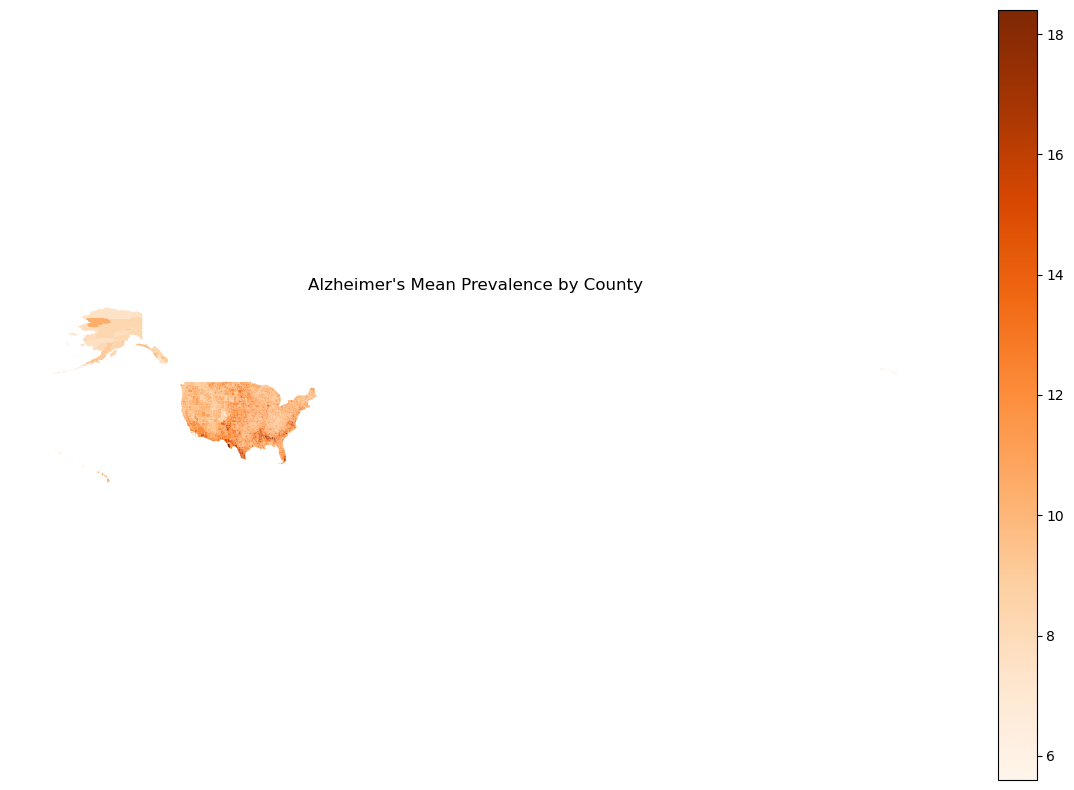

In [199]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
geo_alz_map_data.plot(
    column='Mean Prevalence%',
    cmap='Oranges',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_title('Alzheimer\'s Mean Prevalence by County')
ax.axis('off')

plt.show()

In [200]:
geo_alz_map_data_ak = geo_alz_map_data[geo_alz_map_data["STATEFP"] == "02"]
geo_alz_map_data_ak

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
67,"Aleutians East Borough, Alaska",02013,0.4,"9.5 (8.9, 10)","0 (0, 0)",9.4,43.6,1.9,4.8,9.5,...,G4020,None,None,None,A,18091672533,20799851130,+55.2450437,-161.9974772,"MULTIPOLYGON (((-166.22565 54.04199, -166.2080..."
68,"Aleutians West Census Area, Alaska",02016,0.4,"6.7 (6.2, 7.1)","0 (0, 0)",4.3,39.7,2.7,5.7,6.7,...,G4020,None,None,None,S,11377885025,25183635754,+51.9594469,+178.3388130,"MULTIPOLYGON (((-179.23023 51.28393, -179.2256..."
69,"Anchorage Borough, Alaska",02020,35.1,"9.5 (8.9, 10)","3.3 (3.1, 3.5)",8.9,52.7,4.3,4.0,9.5,...,G4020,None,11260,None,C,4420814009,621079537,+61.1742503,-149.2843294,"POLYGON ((-150.42647 61.16751, -150.40594 61.1..."
70,"Bethel Census Area, Alaska",02050,1.5,"7.6 (7.2, 8.1)","0.1 (0.1, 0.1)",4.6,50.6,1.4,0.8,7.6,...,G4020,None,None,None,S,105223804364,12764675306,+60.9291413,-160.1526246,"MULTIPOLYGON (((-172.88569 60.2088, -172.86701..."
71,"Bristol Bay Borough, Alaska",02060,0.2,"9.1 (8.6, 9.6)","0 (0, 0)",8.6,46.7,1.3,1.3,9.1,...,G4020,None,None,None,A,1248315815,949775630,+58.7416610,-156.9668053,"POLYGON ((-157.99996 58.64217, -157.98366 58.6..."
72,"Denali Borough, Alaska",02068,0.3,"7.8 (7.2, 8.3)","0 (0, 0)",4.9,42.0,1.9,4.5,7.8,...,G4020,None,None,None,A,32740165582,66105677,+63.6820386,-150.0270164,"POLYGON ((-152.99765 62.7274, -152.99512 62.72..."
73,"Dillingham Census Area, Alaska",02070,0.5,"8.2 (7.7, 8.6)","0 (0, 0)",6.9,49.0,0.4,1.5,8.2,...,G4020,None,None,None,S,47484825241,5943879883,+59.5433255,-158.2671226,"MULTIPOLYGON (((-160.54406 58.68784, -160.5374..."
74,"Fairbanks North Star Borough, Alaska",02090,11.2,"8.4 (7.9, 8.9)","0.9 (0.9, 1)",6.5,49.1,2.6,2.5,8.4,...,G4020,None,21820,None,A,18997100791,259310746,+64.6760436,-146.5481586,"POLYGON ((-148.66326 64.59079, -148.66008 64.5..."
75,"Haines Borough, Alaska",02100,0.6,"8.4 (7.9, 8.8)","0.1 (0, 0.1)",7.4,51.8,0.5,1.3,8.4,...,G4020,None,None,None,A,6069358955,1041214321,+59.0984037,-135.5757906,"POLYGON ((-136.49576 59.27513, -136.4942 59.27..."
76,"Hoonah-Angoon Census Area, Alaska",02105,0.5,"8.5 (8, 8.9)","0 (0, 0)",7.4,41.7,0.6,1.3,8.5,...,G4020,None,None,None,S,16978039504,7804886156,+58.4033360,-135.8849090,"MULTIPOLYGON (((-135.92712 59.4041, -135.92689..."


In [201]:
geo_alz_map_data_hi = geo_alz_map_data[geo_alz_map_data["STATEFP"] == "15"]
geo_alz_map_data_hi

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
544,"Hawaii County, Hawaii",15001,45.8,"9.9 (9.3, 10.5)","4.5 (4.3, 4.8)",11.4,51.9,0.7,4.4,9.9,...,G4020,None,25900,None,A,10433635373,2739472560,+19.5977643,-155.5024434,"POLYGON ((-155.03 19.7921, -155.02991 19.79207..."
545,"Honolulu County, Hawaii",15003,181.1,"12 (11.4, 12.6)","21.7 (20.6, 22.8)",17.1,55.7,1.0,2.5,12.0,...,G4020,None,46520,None,A,1555612626,4054877012,+21.4613654,-158.2019740,"MULTIPOLYGON (((-166.38653 23.84636, -166.3842..."
546,"Kalawao County, Hawaii",15005,0.0,"17.3 (16.6, 18)","0 (0, 0)",38.6,63.6,0.0,0.0,17.3,...,G4020,None,None,None,G,31057603,105764468,+21.2187644,-156.9740097,"POLYGON ((-157.01506 21.26119, -157.00909 21.2..."
547,"Kauai County, Hawaii",15007,15.3,"10.6 (10, 11.2)","1.6 (1.5, 1.7)",13.3,53.5,0.7,4.4,10.6,...,G4020,None,28180,None,A,1605492716,1674243852,+22.0120383,-159.7059653,"MULTIPOLYGON (((-160.60088 21.65816, -160.5997..."
548,"Maui County, Hawaii",15009,32.8,"10.2 (9.6, 10.8)","3.3 (3.2, 3.5)",11.8,53.0,0.7,4.4,10.2,...,G4020,None,27980,None,A,3008348851,3203294213,+20.8559308,-156.6015502,"MULTIPOLYGON (((-156.45958 20.97623, -156.4589..."


In [202]:
geo_alz_map_data_cont = geo_alz_map_data[~geo_alz_map_data["STATEFP"].isin(["02","15"])]
geo_alz_map_data_cont

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,"Autauga County, Alabama",01001,9.1,"11.4 (10.8, 11.9)","1 (1, 1.1)",10.2,56.0,14.8,1.2,11.4,...,G4020,388,33860,None,A,1539634184,25674812,+32.5322367,-086.6464395,"POLYGON ((-86.58826 32.36775, -86.58834 32.367..."
1,"Baldwin County, Alabama",01003,49.5,"10 (9.5, 10.5)","4.9 (4.7, 5.2)",9.2,53.9,5.0,1.5,10.0,...,G4020,380,19300,None,A,4117656514,1132955729,+30.6592183,-087.7460666,"POLYGON ((-87.61542 31.041, -87.61542 31.04073..."
2,"Barbour County, Alabama",01005,5.0,"13.5 (12.9, 14.1)","0.7 (0.6, 0.7)",10.4,56.5,37.1,1.1,13.5,...,G4020,None,21640,None,A,2292160149,50523213,+31.8702531,-085.4051035,"POLYGON ((-85.41585 31.68164, -85.41619 31.677..."
3,"Bibb County, Alabama",01007,3.8,"11.3 (10.8, 11.9)","0.4 (0.4, 0.5)",10.5,55.7,13.7,1.5,11.3,...,G4020,142,13820,None,A,1612188717,9572303,+33.0158929,-087.1271475,"POLYGON ((-86.87657 33.01891, -86.87657 33.018..."
4,"Blount County, Alabama",01009,11.0,"10.1 (9.6, 10.7)","1.1 (1.1, 1.2)",10.1,54.6,1.4,2.7,10.1,...,G4020,142,13820,None,A,1670259090,14860281,+33.9773575,-086.5664400,"POLYGON ((-86.56421 33.80194, -86.56556 33.801..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,"Sweetwater County, Wyoming",56037,5.9,"9.2 (8.6, 9.8)","0.5 (0.5, 0.6)",8.0,50.6,1.1,8.8,9.2,...,G4020,None,40540,None,A,27005754359,166230245,+41.6603282,-108.8756774,"POLYGON ((-109.56509 40.99839, -109.56522 40.9..."
3136,"Teton County, Wyoming",56039,3.9,"9.3 (8.7, 9.8)","0.4 (0.3, 0.4)",9.4,49.0,0.7,3.1,9.3,...,G4020,None,27220,None,A,10351790059,570859114,+44.0486620,-110.4260870,"POLYGON ((-110.1196 44.13258, -110.11952 44.13..."
3137,"Uinta County, Wyoming",56041,3.2,"8.7 (8.2, 9.2)","0.3 (0.3, 0.3)",8.0,50.0,0.8,4.2,8.7,...,G4020,None,21740,None,A,5391631765,16625817,+41.2847255,-110.5589468,"POLYGON ((-110.5849 41.57916, -110.58367 41.57..."
3138,"Washakie County, Wyoming",56043,1.8,"11.1 (10.4, 11.7)","0.2 (0.2, 0.2)",13.0,51.7,0.4,5.9,11.1,...,G4020,None,None,None,A,5798152471,10415890,+43.8788305,-107.6690520,"POLYGON ((-107.68405 44.1664, -107.68402 44.16..."


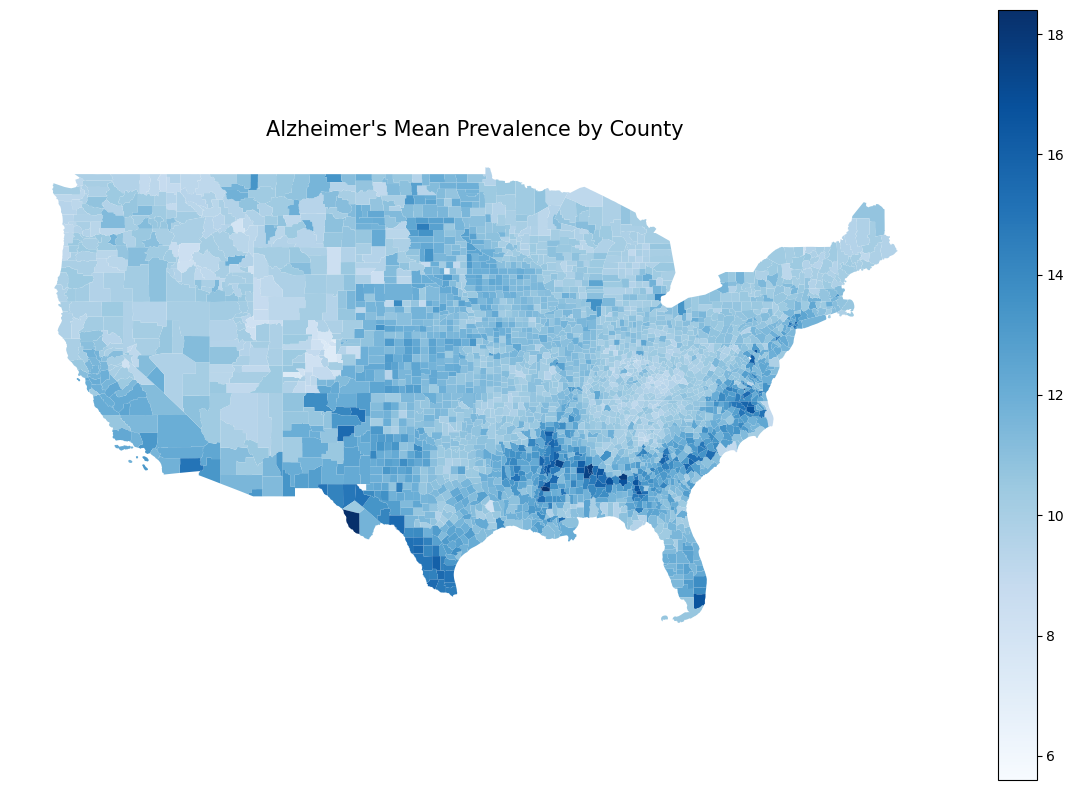

In [238]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
geo_alz_map_data_cont.plot(
    column='Mean Prevalence%',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_title('Alzheimer\'s Mean Prevalence by County', fontsize=15)
ax.axis('off')

plt.show()

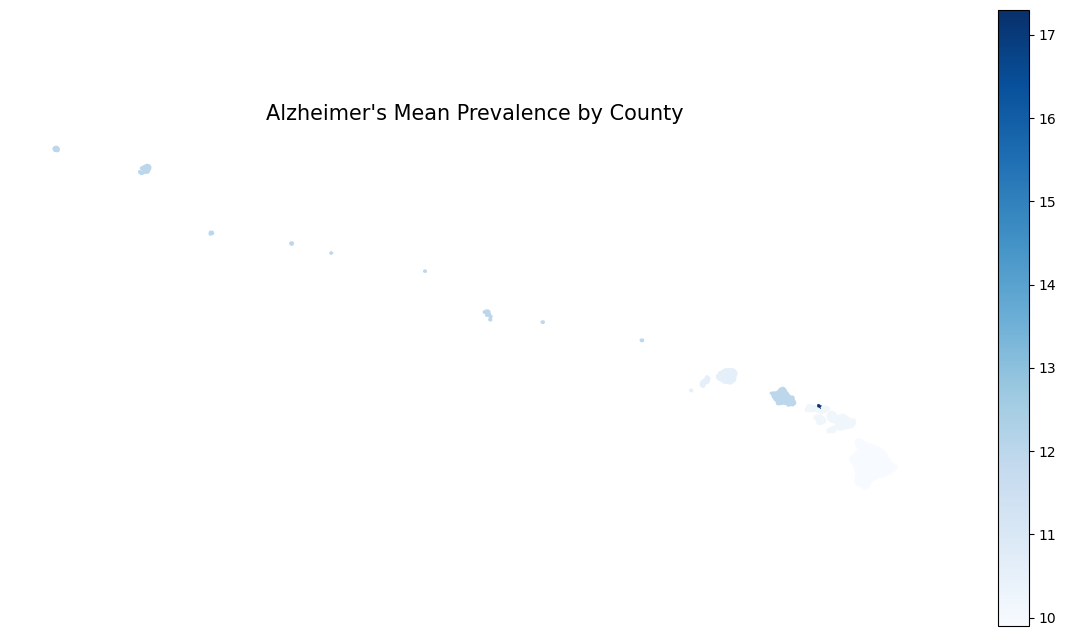

In [239]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
geo_alz_map_data_hi.plot(
    column='Mean Prevalence%',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_aspect('equal')
ax.set_title('Alzheimer\'s Mean Prevalence by County', fontsize=15)
ax.axis('off')

plt.show()

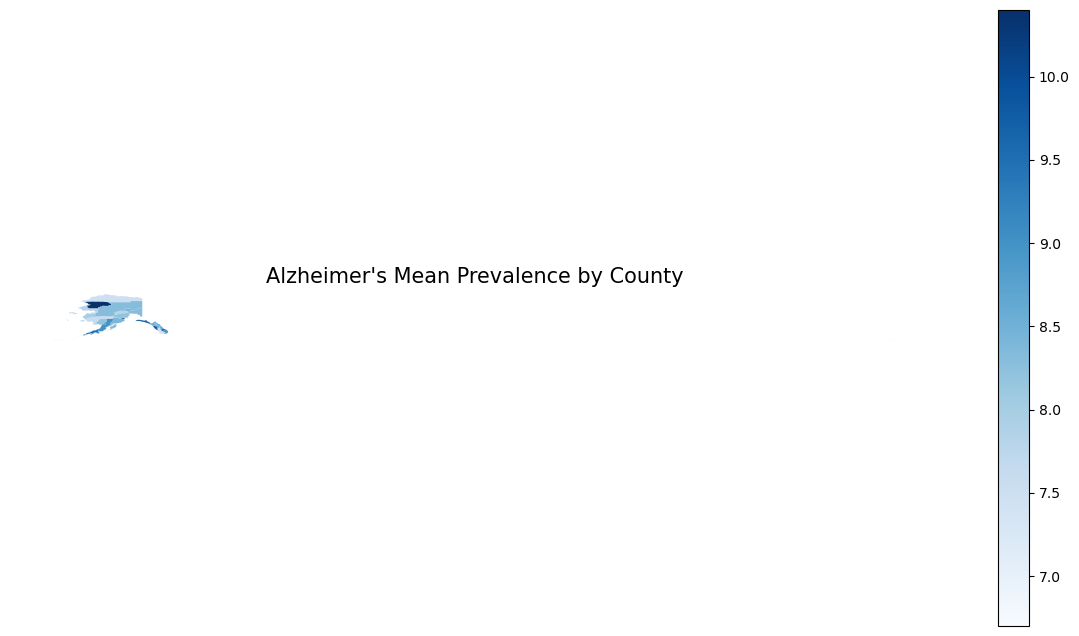

In [205]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
geo_alz_map_data_ak.plot(
    column='Mean Prevalence%',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_aspect('equal')
ax.set_title('Alzheimer\'s Mean Prevalence by County', fontsize=15)
ax.axis('off')

plt.show()

## smth pls work out!

In [227]:
df_cancermerge['FIPS'] = df_cancermerge['FIPS'].astype(int)
df_cancermerge['FIPS'] = df_cancermerge['FIPS'].astype(str).str.zfill(5)

In [228]:
df_comb = pd.merge(df_alz, df_cancermerge, how="inner", on="FIPS")

In [229]:
import numpy as np
df_comb["Relationship"] = df_comb["Cancer Rate"]/df_comb["Mean Prevalence%"]
df_comb["Cancer Rate_log10"] = np.log10(df_comb["Cancer Rate"])
# Here!!!
df_comb.loc[df_comb["Relationship"] == 0, "Relationship"] = 1

df_comb["Relationship_log10"] = np.log10(df_comb["Relationship"])
comb_map_data = pd.merge(df_comb, geo_df, how="inner", left_on="FIPS", right_on="GEOID")
comb_map_data = gpd.GeoDataFrame(comb_map_data)
comb_map_data

,County,FIPS,"No. of people age 65y and older, in thousands","Prevalence, % (95%CI)","No. (95%CI) of people with AD, in thousands","Age 85 years or more, %","Women, %","Black or African American, %","Hispanic, %",Mean Prevalence%,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,"Autauga County, Alabama",01001,9.1,"11.4 (10.8, 11.9)","1 (1, 1.1)",10.2,56.0,14.8,1.2,11.4,...,G4020,388,33860,None,A,1539634184,25674812,+32.5322367,-086.6464395,"POLYGON ((-86.58826 32.36775, -86.58834 32.367..."
1,"Baldwin County, Alabama",01003,49.5,"10 (9.5, 10.5)","4.9 (4.7, 5.2)",9.2,53.9,5.0,1.5,10.0,...,G4020,380,19300,None,A,4117656514,1132955729,+30.6592183,-087.7460666,"POLYGON ((-87.61542 31.041, -87.61542 31.04073..."
2,"Barbour County, Alabama",01005,5.0,"13.5 (12.9, 14.1)","0.7 (0.6, 0.7)",10.4,56.5,37.1,1.1,13.5,...,G4020,None,21640,None,A,2292160149,50523213,+31.8702531,-085.4051035,"POLYGON ((-85.41585 31.68164, -85.41619 31.677..."
3,"Bibb County, Alabama",01007,3.8,"11.3 (10.8, 11.9)","0.4 (0.4, 0.5)",10.5,55.7,13.7,1.5,11.3,...,G4020,142,13820,None,A,1612188717,9572303,+33.0158929,-087.1271475,"POLYGON ((-86.87657 33.01891, -86.87657 33.018..."
4,"Blount County, Alabama",01009,11.0,"10.1 (9.6, 10.7)","1.1 (1.1, 1.2)",10.1,54.6,1.4,2.7,10.1,...,G4020,142,13820,None,A,1670259090,14860281,+33.9773575,-086.5664400,"POLYGON ((-86.56421 33.80194, -86.56556 33.801..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,"Sweetwater County, Wyoming",56037,5.9,"9.2 (8.6, 9.8)","0.5 (0.5, 0.6)",8.0,50.6,1.1,8.8,9.2,...,G4020,None,40540,None,A,27005754359,166230245,+41.6603282,-108.8756774,"POLYGON ((-109.56509 40.99839, -109.56522 40.9..."
2926,"Teton County, Wyoming",56039,3.9,"9.3 (8.7, 9.8)","0.4 (0.3, 0.4)",9.4,49.0,0.7,3.1,9.3,...,G4020,None,27220,None,A,10351790059,570859114,+44.0486620,-110.4260870,"POLYGON ((-110.1196 44.13258, -110.11952 44.13..."
2927,"Uinta County, Wyoming",56041,3.2,"8.7 (8.2, 9.2)","0.3 (0.3, 0.3)",8.0,50.0,0.8,4.2,8.7,...,G4020,None,21740,None,A,5391631765,16625817,+41.2847255,-110.5589468,"POLYGON ((-110.5849 41.57916, -110.58367 41.57..."
2928,"Washakie County, Wyoming",56043,1.8,"11.1 (10.4, 11.7)","0.2 (0.2, 0.2)",13.0,51.7,0.4,5.9,11.1,...,G4020,None,None,None,A,5798152471,10415890,+43.8788305,-107.6690520,"POLYGON ((-107.68405 44.1664, -107.68402 44.16..."


In [230]:
comb_map_data["Relationship_log10"].sample(10)

1752    1.494284
902     1.748922
2796    1.700932
742     1.687615
1368    1.645405
1234    1.564378
73      1.732492
2089    1.626993
1132    1.654462
2722    1.526510
Name: Relationship_log10, dtype: float64

In [231]:
comb_map_data[["County", "Relationship", "Relationship_log10"]][comb_map_data.index == 1458]

,County,Relationship,Relationship_log10
1458,"Brown County, Nebraska",34.85124,1.542218


In [232]:
comb_map_data_cont = comb_map_data[~comb_map_data["STATEFP"].isin(["02","15"])]

In [233]:
comb_map_data_ak = comb_map_data[comb_map_data["STATEFP"].isin(["02"])]
comb_map_data_hi = comb_map_data[comb_map_data["STATEFP"].isin(["15"])]

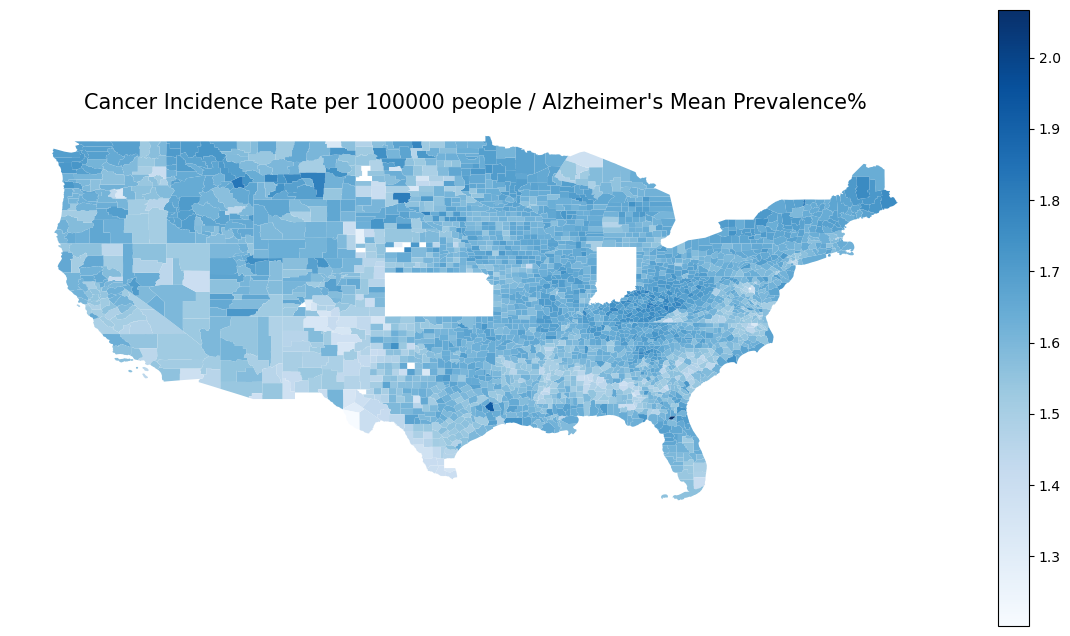

In [234]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
comb_map_data_cont.plot(
    column='Relationship_log10',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_aspect('equal')
ax.set_title('Cancer Incidence Rate per 100000 people / Alzheimer\'s Mean Prevalence%', fontsize=15)
ax.axis('off')

plt.show()

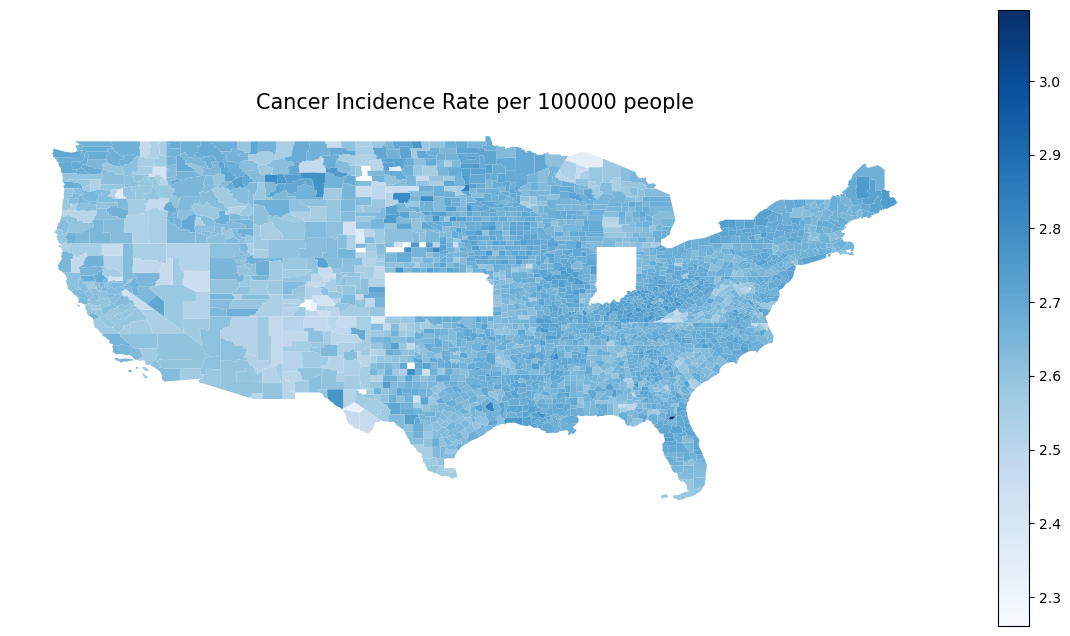

In [235]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
comb_map_data_cont.plot(
    column='Cancer Rate_log10',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_aspect('equal')
ax.set_title('Cancer Incidence Rate per 100000 people', fontsize=15)
ax.axis('off')

plt.show()

In [236]:
comb_map_data_cont[["County", "FIPS", "Cancer Rate", "Mean Prevalence%", "Relationship"]].nlargest(5, "Relationship")

,County,FIPS,Cancer Rate,Mean Prevalence%,Relationship
378,"Union County, Florida",12125,1248.4,10.7,116.672897
2497,"Polk County, Texas",48373,679.5,8.0,84.937500
1417,"Jefferson County, Montana",30043,537.7,7.9,68.063291
826,"Floyd County, Kentucky",21071,606.6,9.2,65.934783
889,"Powell County, Kentucky",21197,592.1,9.0,65.788889


High Relationship number means that cancer rate is high compared to the alzheimers prevelance rate. If there was an inverse relationship (like the study may have suggested), then that means that this relationship number would be higher as cancer rate goes up. If it stays stagnant, then the that means that as cancer rate goes up, prevalence rate goes up.

<Axes: ylabel='Frequency'>

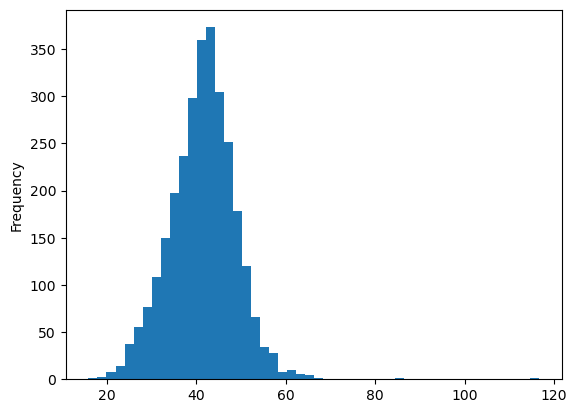

In [218]:
comb_map_data["Relationship"].plot.hist(bins=50)

In [219]:
comb_map_data["Relationship"].describe()

count    2930.000000
mean       41.379591
std         7.341006
min        15.923913
25%        36.747967
50%        41.709091
75%        45.972024
max       116.672897
Name: Relationship, dtype: float64

<Axes: >

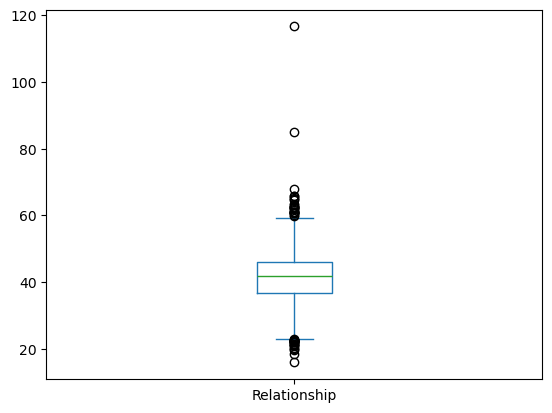

In [ ]:
comb_map_data["Relationship"].plot.box()

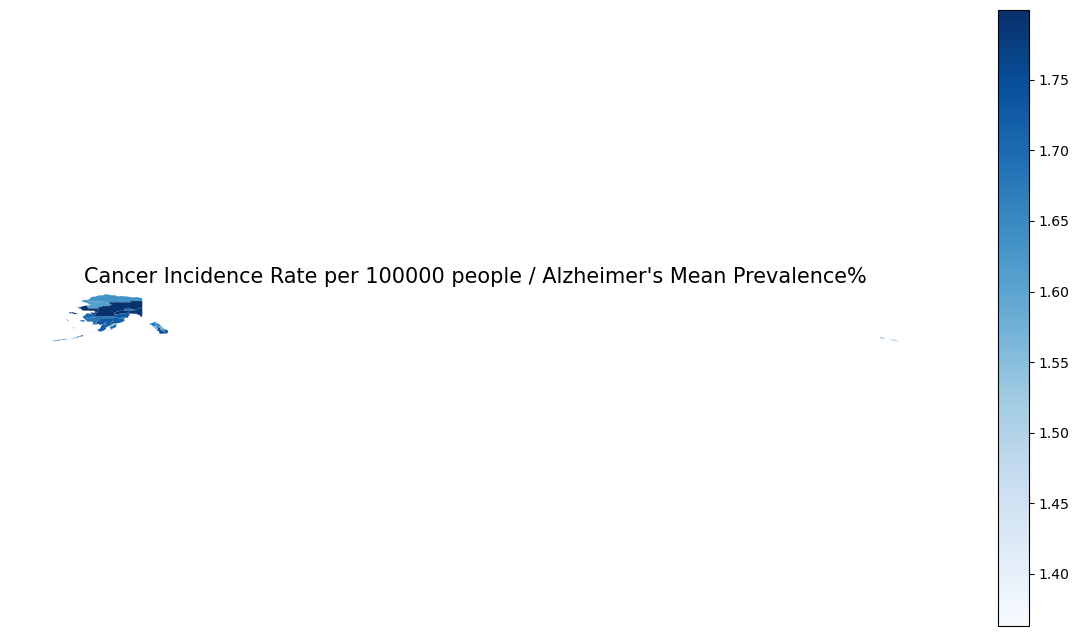

In [221]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
comb_map_data_ak.plot(
    column='Relationship_log10',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_aspect('equal')
ax.set_title('Cancer Incidence Rate per 100000 people / Alzheimer\'s Mean Prevalence%', fontsize=15)
ax.axis('off')

plt.show()

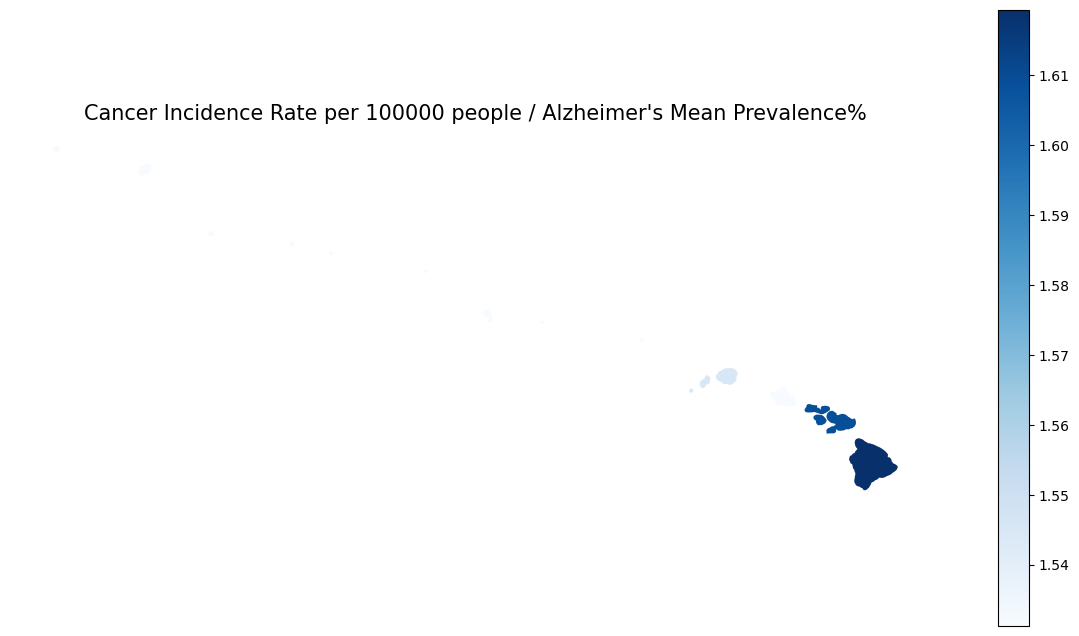

In [224]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
comb_map_data_hi.plot(
    column='Relationship_log10',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_aspect('equal')
ax.set_title('Cancer Incidence Rate per 100000 people / Alzheimer\'s Mean Prevalence%', fontsize=15)
ax.axis('off')

plt.show()

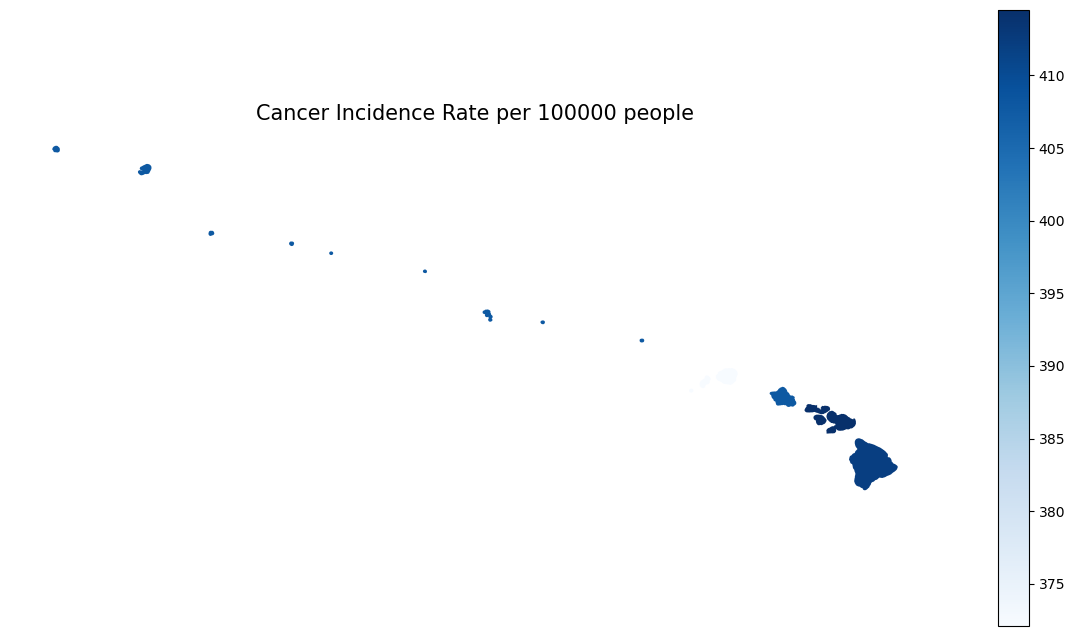

In [242]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
comb_map_data_hi.plot(
    column='Cancer Rate',
    cmap='Blues',
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "Missing data"}
)
ax.set_aspect('equal')
ax.set_title('Cancer Incidence Rate per 100000 people', fontsize=15)
ax.axis('off')

plt.show()